# Handwritten Digit Recognition
## Using 5 layer neural network 
### Activation function: RELU  
### Learning rate: dynamic 
### Including Dropouts for each RELU layer

In [1]:
# including helper file to use some handy functions
import os
helper_file = os.getcwd() + '\\helpers.ipynb'
%run $helper_file

# importing needed libraries
import numpy as np
import tensorflow as tf
import math

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [22]:
# parameters
BATCH_SIZE = 100
ITERATION_COUNT = 1000
ACCURACY_CHECK = 10

In [32]:
def train(mnist_data, batch_size, iteration_count, accuracy_check):
    
    image_width  = 28
    image_height = 28
    
    C0 = 1   # input channel count
    C1 = 200 # convolutional network channel 1 count 
    #C2 = 100 # convolutional network channel 2 count
    #C3 = 60  # convolutional network channel 3 count
    #C4 = 30  # fulley connected layer size
    C5 = 10  # output count (digit count 0 to 9)
    
    # weights
    W1 = tf.Variable(tf.truncated_normal([image_width * image_height, C1], stddev = 0.1)) 
    #W2 = tf.Variable(tf.truncated_normal([C1, C2], stddev = 0.1))
    #W3 = tf.Variable(tf.truncated_normal([C2, C3], stddev = 0.1))
    #W4 = tf.Variable(tf.truncated_normal([C3, C4], stddev = 0.1))
    W5 = tf.Variable(tf.truncated_normal([C1, C5], stddev = 0.1))
    
    # biases
    B1 = tf.Variable(tf.ones([C1]) / 10)
    #B2 = tf.Variable(tf.ones([C2]) / 10)
    #B3 = tf.Variable(tf.ones([C3]) / 10)
    #B4 = tf.Variable(tf.ones([C4]) / 10)
    B5 = tf.Variable(tf.zeros([C5]))
    
    # Probability of keeping a node during dropout = 1.0 at test time (no dropout) and 0.75 at training time
    keep_prob = tf.placeholder(tf.float32)

    # model
    X   = tf.placeholder(tf.float32, shape=[None, image_width * image_height])
    Y1  = tf.nn.relu(tf.matmul(X , W1) + B1)
    #Y1d = tf.nn.dropout(Y1, keep_prob)
    #Y2  = tf.nn.relu(tf.matmul(Y1, W2) + B2)
    #Y2d = tf.nn.dropout(Y2, pkeep)
    #Y3  = tf.nn.relu(tf.matmul(Y2, W3) + B3)
    #Y3d = tf.nn.dropout(Y3, pkeep)
    #Y4  = tf.nn.relu(tf.matmul(Y3, W4) + B4)
    #Y4d = tf.nn.dropout(Y4, pkeep)
    Ylogits = tf.matmul(Y1, W5) + B5
    Y = tf.nn.softmax(Ylogits)
    
    # paceholder for learing_rate variable
    lr = tf.placeholder(tf.float32)
    
    # placeholder for correct answers
    Y_ = tf.placeholder(tf.float32, [None, C5])
    
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = Ylogits, labels = Y_)
    cross_entropy = tf.reduce_mean(cross_entropy) * 100
    
    # accuracy of the trained model, between 0 (worst) and 1 (best)
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # training step, the learning rate is a placeholder
    train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

    # initialisation
    init = tf.global_variables_initializer()

    # start computation
    sess = tf.Session()
    sess.run(init)
    
    # preparing return values
    counter = 0 
    upper_bound = int(iteration_count / accuracy_check)
    iterations = np.arange(0, upper_bound)
    train_accuracy = np.zeros(upper_bound)
    train_loss = np.zeros(upper_bound)
    test_accuracy = np.zeros(upper_bound)
    test_loss = np.zeros(upper_bound)
    learning_rates = np.zeros(1)
    
    for i in range(iteration_count):
        
        # learning rate decay
        max_learning_rate = 0.003
        min_learning_rate = 0.0001
        decay_speed = 2000.0 # 0.003-0.0001-2000=>0.9826 done in 5000 iterations
        learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-i/decay_speed)
        
        # load batch of images and correct answers
        batch_X , batch_Y = mnist_data.train.next_batch(batch_size)
        
        # train
        sess.run(train_step, feed_dict = {X: batch_X, Y_: batch_Y, lr: learning_rate, keep_prob: 0.75})
        
        if i % accuracy_check == 0:

            #a , c = sess.run([accuracy, cross_entropy], feed_dict = {X: batch_X, Y_: batch_Y, keep_prob: 1.0})
            #train_accuracy[counter] = a
            #train_loss[counter] = c
            
            #test_data = {X: mnist_data.test.images, Y_: mnist_data.test.labels, keep_prob: 1.0}
            #pred, a , c = sess.run([Y, accuracy, cross_entropy], feed_dict = test_data)
            #predictions = tf.argmax(pred,1).eval(session=sess)
           
            #test_accuracy[counter] = a
            #test_loss[counter] = c
            
            counter += 1
            
    learning_rates[0] = learning_rate
    acc = accuracy.eval(session = sess, feed_dict = {X: mnist_data.test.images, Y_: mnist_data.test.labels})
    print('Learning Rate: {}, Accuracy: {}'.format(learning_rate, acc))
    sess.close()
    
    return iterations, train_accuracy, train_loss, test_accuracy, test_loss, predictions, learning_rates;

In [33]:
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []

%time acc_check, temp_train_acc, temp_train_loss, temp_test_acc, temp_test_loss, predictions, learning_rates = train(mnist, BATCH_SIZE, ITERATION_COUNT, ACCURACY_CHECK)

train_accuracy.append(temp_train_acc)
train_loss.append(temp_train_loss)
test_accuracy.append(temp_test_acc)
test_loss.append(temp_test_loss)

Learning Rate: 0.001859818602527234, Accuracy: 0.9707001447677612
Wall time: 4.91 s


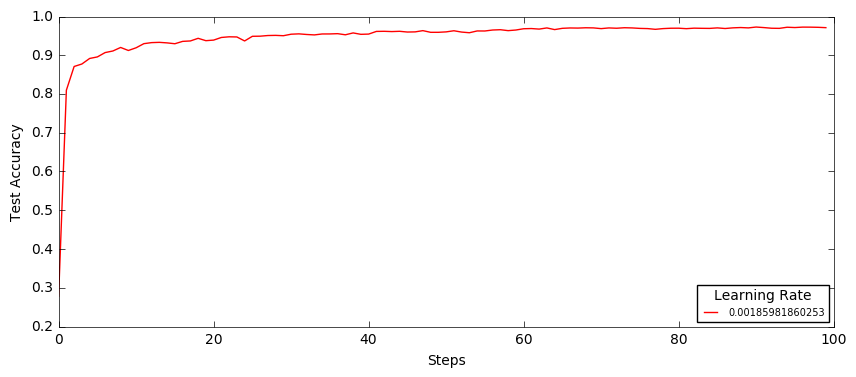

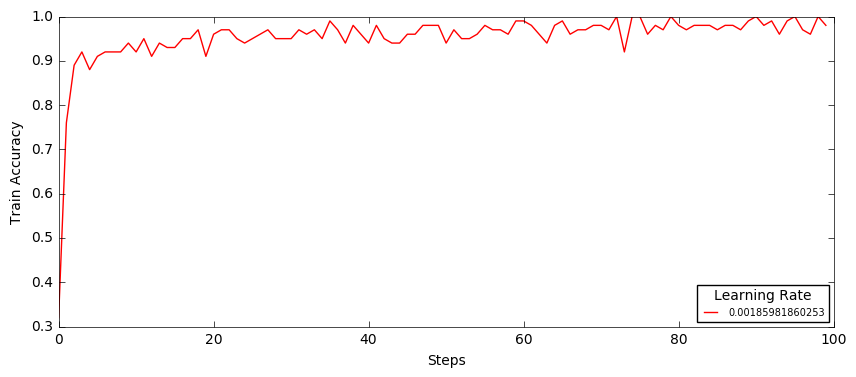

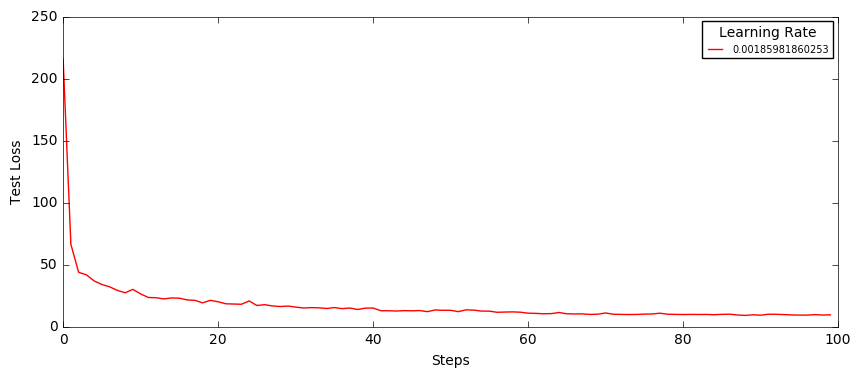

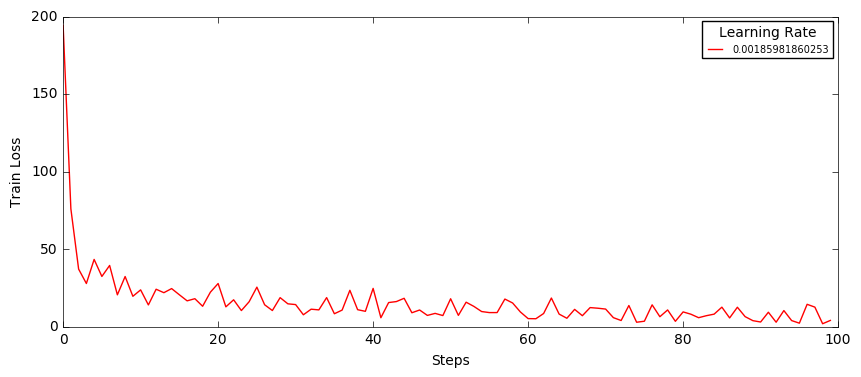

In [25]:
plot_performance(acc_check, learning_rates, train_accuracy, train_loss, test_accuracy, test_loss)

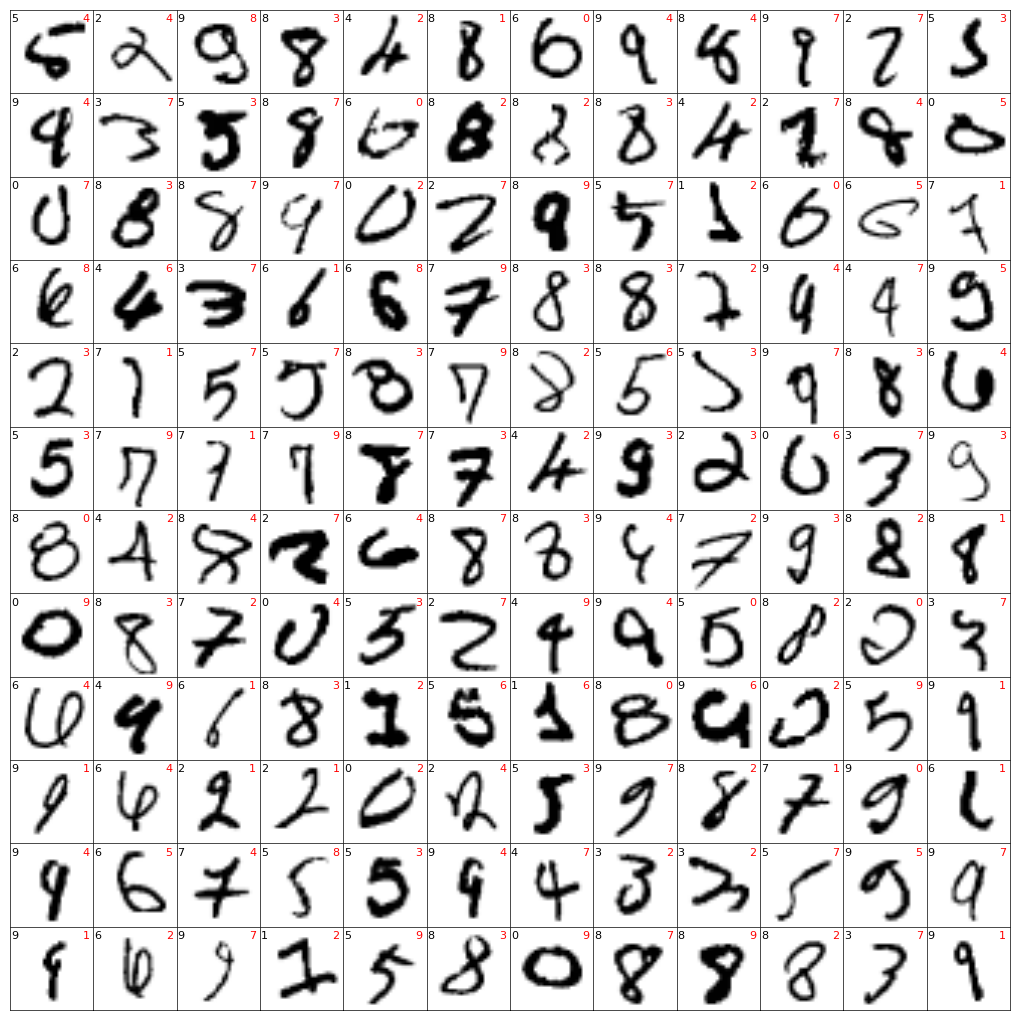

In [13]:
labels = np.argmax(mnist.test.labels, 1)
incorects = np.not_equal(labels, predictions)
plot_batch_images(mnist.test.images[incorects], labels[incorects], predictions[incorects], 144)